In [1]:
#Importamos librerias de interes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snb; snb.set();

from Soluciones.Manager import Actividad
from Soluciones.Ejercicios import *


# Derivada

**Objetivo general**
- Revisar el concepto de derivada con multiples Ejemplos, así como herramientas visuales que permitan comprender el sentido geometrico de la Derivada

**Objetivos particulares**
- Comprender que nos motiva a defirnir la Derivada
- Revisar algunas de las ditintas reglas de derivación
- Realizar ejercicios que fortalezcan los conceptos aprendidos

## Contenido
- [1 - Introcción.](#1)
    - [1.1 - Ejemplo 1](#1-1)
- [2 - Definición de Derivada.](#2)
    - [2.1 - Ejemplo 2.](#2-1)
- [3 - Reglas de Derivación.](#3)    
    - [3.1 - Regla de potencias](#3-1)
    - [3.2 - Regla de la función constante](#3-2)
    - [3.3 - Regla de la multiplicación por constante](#3-3)
    - [3.4 - Regla de suma y diferencia](#3-4)
    - [3.5 - Regla del producto](#3-5)
    - [3.6 - Regla del cociente](#3-6)
    - [3.7 - Regla  de la cadena](#3-7)
    - [3.8 - Regla de L’Hôpital](#3-8)
    - [3.9 - Derivadas de funciones trigonométricas](#3-9)
- [4 - Teorema de Rolle.](#4)
    - [4.1 - Ejemplo 3.](#4-1)
- [5 - Derivadas de orden superior.](#5)
    - [5.1 - Ejemplo 4.](#5-1)
    - [5.2 - Ejemplo 5.](#5-2)
    
    


<a name='1'></a>
## Introducción

Si revisamos con cuidado, algunas definiciones matemáticas utilizan un tipo de figura literaria conocida como <a href=https://es.wikipedia.org/wiki/Ox%C3%ADmoron>*oxímoron*</a>. En términos simples, un oxímoron consiste en usar dos conceptos de significado opuesto y con ello generar un tercer concepto. 

Por ejemplo: **La razón de cambio instantáneo**. 
- Cuando se habla de un *cambio*, se requiere de la comparación entre dos o más estados y con ello analizar las diferencias entre un estado y otro; 
- por otro lado, la palabra *instantáneo* tiene que ver con algo que dura un instante, es decir un tiempo puntal. 

Entonces el concepto "**cambio instantáneo**" representa un oxímoron. Pero ¿cuál es su significado?
¿Será importante este concepto en nuestra vida diaria?

En lo que sigue veremos que la razón de cambio instantáneo tiene que ver con un concepto muy importante en Cálculo: *la derivada*.

<a name='1-1'></a>
### Ejemplo 1

Un estudiante de lenguas participará en un concurso internacional cuyo principal reto es el conocimiento del vocabulario de un cierto idioma. Por ello, es importante que el estudiante utilice un método de estudio adecuado para recordar el significado del mayor número de palabras posible.

La <a href=https://es.wikipedia.org/wiki/Curva_del_olvido>curva del olvido</a> puede ayudar al estudiante a generar un plan de estudio adecuado. La función que define esta curva es la siguiente:

$$
R(t) = e^{-t/S}
$$

donde $R$ es cuanto recordamos, $S$ es la intensidad del recuerdo y $t$ el tiempo. Podemos definir $S \in (0,1]$, donde $1$ es la máxima intensidad de recuerdo y un valor cercano a $0$ corresponde a algo que no nos interesa nada.

**Observación**: $S$ no puede ser exactamente $0$ por que en ese caso la función $R(t)$ no está definida.

La siguiente gráfica muestra cómo decrecen nuestros recuerdos con el paso del tiempo.

In [2]:
#Definimos la funcion de olvido

def Funcion(t,s):
    return np.exp(-t/s)

A continuación se muestra la grafica para la funcion de Olvido para varios valores de S

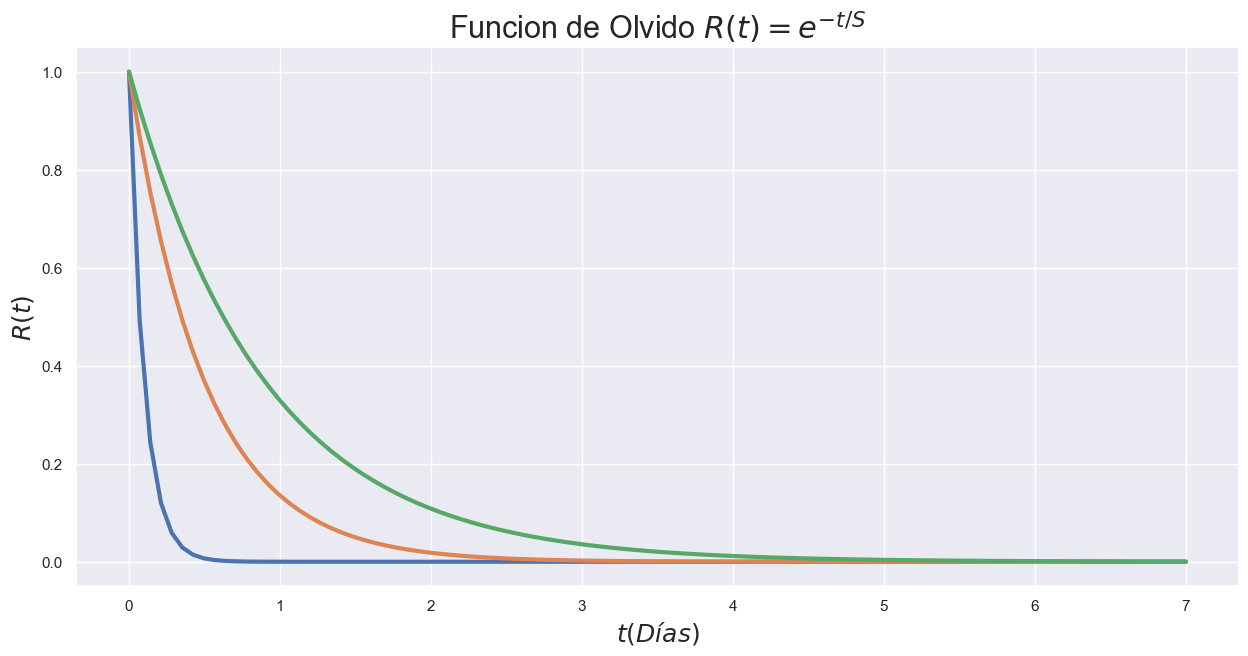

In [3]:
#Configuracion del Grafico

plt.figure(figsize=(15,7))
plt.title("Funcion de Olvido $R(t)=e^{-t/S}$",fontsize=22)
plt.ylabel("$R(t)$",fontsize=18)
plt.xlabel("$t(Días)$",fontsize=18)


#Dominio
ts = np.linspace(0,7,100)

for S in [0.1,0.5,0.9]:
#Imagen para cada valor de S
    R = [Funcion(t,S) for t in ts]
    plt.plot(ts,R,lw=3)
    
plt.show()

¿Será posible determinar cada cuanto tiempo el estudiante debe repasar las palabras para que no las olvide y pueda ganar el concurso? ¿De qué depende esto?

Tomemos por ejemplo el caso de $S=0.9$ (curva naranja). ¿En qué parte de la gráfica el descenso es más rápido?, en otras palabras, ¿en qué parte de la gráfica el olvido se incrementa?,Para conocer ese descenso, debemos calcular la pendiente y eso lo podemos hacer con la siguiente fórmula:

$$
m = \frac{R(t_2) - R(t_1)}{t_2 - t_1}
$$

Como es obvio, este valor de la pendiente cambiará cuando $t_1$ y $t_2$ cambien. 

Definamos entonces $h = t_2 - t_1$ y $t = t_1$. 

Con ello podemos escribir:

$$
m(t) = \frac{R(t + h) - R(t)}{h}
$$

En esta última fórmula vemos que la pendiente depende de $t$.

Vamos a calcular $m$ para $h = 1$ y $t = [0,1,2,3,4,5,6]$:

In [4]:
# Vamos a trabajar con el siguiente valor de S
S = 0.9
h = 1.0
td = np.arange(0,8,h) # Definición de las t = 0,1,2,...,6
m = np.zeros(len(td)) # Arreglo para almacenar las pendientes

# Calculamos la pendiente usando la fórmula antes descrita
for i,x in enumerate(td):
    m[i] = (Funcion(x + h, S) - Funcion(x, S)) / h

# Ponemos la información en un DataFrame y la mostramos
tabla = pd.DataFrame(np.array([td, m, ]).T, columns = ['t', 'm(t)'])
tabla

,t,m(t)
0,0.0,-0.670807
1,1.0,-0.220825
2,2.0,-0.072694
3,3.0,-0.023930
4,4.0,-0.007878
5,5.0,-0.002593
6,6.0,-0.000854
7,7.0,-0.000281


Observamos que la pendiente es negativa, lo cual indica un decrecimiento. También, la magnitud de la pendiente (su valor absoluto) disminuye conforme  t  se incrementa. Es posible visualizar la pendiente uniendo los puntos con los que se realizó el cálculo de la misma, y también se puede graficar como función del tiempo, veamos ambas cosas en las siguientes gráficas:

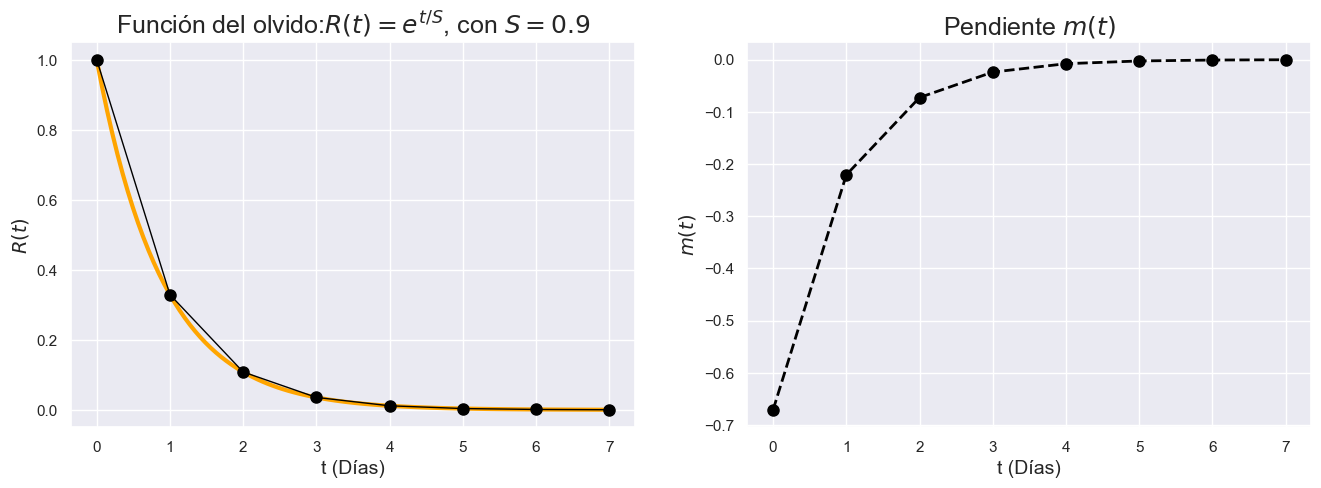

In [5]:
plt.figure(figsize=(16,5))    
    
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_title("Función del olvido:$R(t)=e^{t/S}$, con $S=0.9$",fontsize=18)
ax1.set_xlabel("t (Días)",fontsize=14)
ax1.set_ylabel("$R(t)$",fontsize=14)

ax2.set_title("Pendiente $m(t)$",fontsize=18)
ax2.set_xlabel("t (Días)",fontsize=14)
ax2.set_ylabel("$m(t)$",fontsize=14)


ax1.plot(ts,Funcion(ts,0.9),lw=3,color="orange")
ax1.plot(td,Funcion(td,0.9),marker="o",lw=1,markersize=8,markerfacecolor="black",color="black",alpha=1)

ax2.plot(td,m,ls="dashed",lw=2,marker="o",markersize=8,markerfacecolor="black",color="black")

plt.show()

En la gráfica de la izquierda, la línea negra nos muestra gráficamente el cambio en la pendiente de la recta que une los puntos de la gráfica de $R(t)$. En la gráfica de la derecha, observamos el cámbio de la pendiente $m$ en función de $t$.

Lo que estamos observando es la razón de cambio de $R(t)$ en intervalos de tiempo de longitud $h = 1$. Esto es lo que expresa la fórmula de $m(t)$. 

¿Será posible calcular **la razón de cambio instantáneo**? Para ello, esta razón debería calcularse en un solo instante de tiempo, lo cual implica que $t_1 = t_2 \Longrightarrow h = 0$, y esto nos lleva a que la fórmula de $m(t)$ no está bien definida (división por cero!). Pero, ¿qué pasa si $h$ se hace muy pequeña? es decir:

$$
\lim_{h \to 0}  \frac{R(t + h) - R(t)}{h}
$$

En la siguiente visualización puedes modificar $S$, $h$ y $t$. Observa lo que sucede cuando $h \to 0$. 

In [6]:
%run Ejemplo1.py

interactive(children=(FloatSlider(value=0.5, description='S', max=1.0, min=0.1), FloatSlider(value=0.9, descri…

Conforme $h$ se hace más pequeño, observamos que la línea roja se aproxima cada vez mejor a la línea tangente que pasa por el punto rojo. Dicha línea representa una aproximación a la razón de cambio instantánea en el punto rojo.
Entonces, la tangente en el punto rojo, no es otra cosa que la razón de cambio instantánea. Veremos enseguida que ambas cosas se representan un concepto conocido como *la derivada de la función* en el punto rojo.

<a name='2'></a>
## Definición de derivada

En todos los libros de cálculo encontrarás la siguiente definición y notación para la derivada de la función $f(x)$:

$$ 
\frac{d f}{dx} = f^\prime(x)=\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} 
$$

La derivada existe siempre y cuando exista el límite. ¿Puedes imaginar cuando este límite no existe? Observe que en la definición anterior se está calculando la pendiente de la función $f(x)$ en $x$, ¿cuándo es que esta pendiente no se puede calcular?

Para tener una mejor idea de lo que este límite significa vea el siguiente interactivo.

In [7]:
%run Ejemplo2.py

interactive(children=(FloatSlider(value=6.0, description='x0', max=9.0, step=1.0), FloatSlider(value=1.0, desc…

<a name='2-1'></a>
### Ejemplo 2

Consideremos la función $f(x) = x^3$ y apliquemos la definición de derivada:

$$
\frac{d f}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} = \lim_{h \to 0} \frac{(x + h)^3 - x^3}{h}
$$

Si expandimos los términos del numerador obtenemos:

$$
\frac{d f}{dx} = \lim_{h \to 0} \, (3x^2 + 3 x h + h ^2)
$$

Al calcular el límite de la derecha obtenemos:

$$
\frac{d f}{dx} = 3x^2
$$

Hemos calculado la derivada analítica de $f(x) = x^3$. Veamos como se ven $f(x)$ y $f^\prime(x)$:

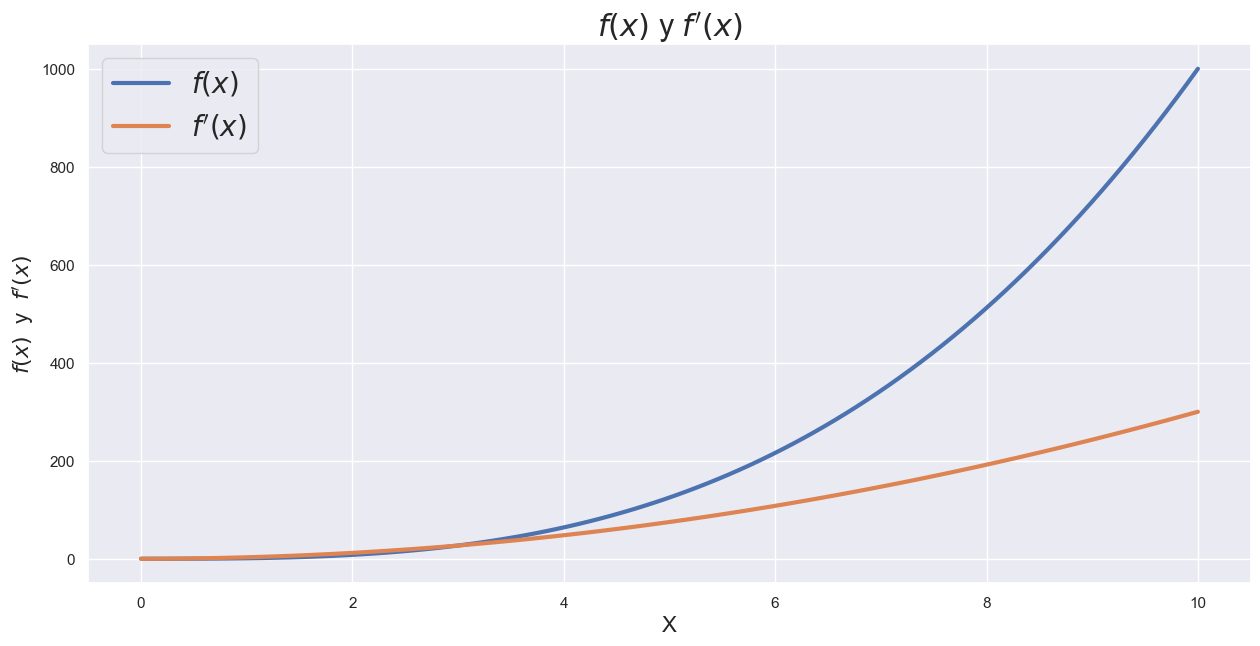

In [8]:
#Dominio
x = np.linspace(0,10,100)

#Imagen de Funcion F
f = [i**3 for i in x]

#Imagen de la derivada de F
f_p = [3*i**2 for i in x]

plt.figure(figsize=(15,7))
plt.plot(x,f,lw=3)
plt.plot(x,f_p,lw=3)

plt.xlabel("X", fontsize=16)
plt.ylabel("$f(x)$  y  $f'(x)$", fontsize=16)
plt.title("$f(x)$ y $f'(x)$",fontsize=22)

plt.legend(["$f(x)$","$f'(x)$"],fontsize=20)

plt.show()

<a name='3'></a>
## Reglas de derivación

En general es fácil calcular la derivada de cualquier función y existen reglas para hacerlo más fácil.
 
<a name='3-1'></a>
**Regla de potencias**

Para cualquier número real $n$ si $f(x)= x^n$, entonces
$$
f^\prime(x) = n * x^{n-1}
$$

<a name='3-2'></a>
**Regla de la función constante**

Si $f(x)=c$ es una función constante, entonces
$$ 
f^\prime(x)=0 
$$

<a name='3-3'></a>
**Regla de la multiplicación por constante**

Si $c$ es cualquier constante y $f(x)$ es diferenciable, entonces $g(x)= c f(x)$ también es diferenciable y su derivada es:
$$ 
g^\prime(x) = c f^\prime(x) 
$$

<a name='3-4'></a>
**Regla de suma y diferencia**

Si $f(x)$ y $g(x)$ son diferenciables, entonces $f(x) + g(x)$ y $f(x) - g(x)$ también son diferenciables y sus derivadas son:
$$ 
[f(x)+ g(x)]^\prime = f^\prime(x) + g^\prime(x) 
$$

$$ 
[f(x)- g(x)]^\prime=f^\prime(x) - g^\prime(x) 
$$

<a name='3-5'></a>
**Regla del producto**

Si $f(x)$ y $g(x)$ son funciones diferenciables, entonces $f(x)g(x)$ es diferenciable y su derivada es:
$$ 
[f(x) g(x)]^\prime= f(x)g^\prime(x) + g(x)f^\prime(x) 
$$

<a name='3-6'></a>
**Regla del cociente**

Si $f$ y $g$ son funciones diferenciables y $g(x) \neq 0$, entonces $f(x)/g(x)$ es diferenciable y su derivada es: 
$$  
\left[\frac{f(x)}{g(x)} \right]^\prime = \frac{f(x)g^\prime(x)- f^\prime(x)g(x) }{g(x)^2}
$$

<a name='3-7'></a>
**Regla  de la cadena**

Si la función $f(u)$ es diferenciable, donde $u = g(x)$, y la función $g(x)$ es diferenciable, entonces la composición $y=(f \circ g)(x)= f(g(x))$ es diferenciable:
$$ 
f(g(x))^\prime = f^\prime(g(x)) \cdot g^\prime(x)  
$$

<a name='3-8'></a>
**Regla de L’Hôpital**

Esta regla es utilizada en caso de indeterminaciones donde $f(x)$ y $g(x)$ son dos funciones continuas definidas en el intervalo $[a,b]$, derivables en $(a,b)$ y sea $c$ perteneciente a $(a,b)$ tal que $f(c)=g(c)=0$ y $g^\prime(x) \neq 0$ si $x \neq c$. Si existe el límite $L$ de $f^\prime/g^\prime$ en $c$, entonces existe el límite de $f(x)/g(x)$ (en $c$) y es igual a $L$. Por lo tanto:
$$ 
\lim_{x \to c} \frac{f(x)}{g(x)} = \lim_{x \to c} \frac{f^\prime(x)}{g^\prime(x)} = L 
$$

<a name='3-9'></a>
**Derivadas de funciones trigonométricas**

$$
\begin{eqnarray}
\sin^\prime(x) & = & \cos(x) \\ 
\tan^\prime(x) & = & \sec^2(x) \\
\sec^\prime(x) & = & \sec(x)tan(x) \\
\cos^\prime(x) & = & -\sin(x) \\
\cot^\prime(x) & = & -\csc^2(x) \\
\csc^\prime(x) & = & -\csc(x)cot(x)
\end{eqnarray}
$$

**Derivada la función exponencial**

$$
\left[ e^{x} \right]^\prime = e^{x}
$$


<a name='4'></a>
***
## Teorema de Rolle :
Sea $a < b$ y suponga que $f : [a, b] → {\mathbb{R}}$ es derivable en $(a, b)$ y continua
en $[a, b]$ y $f(a) = f(b)$. Entonces $∃ x_0 ∈ (a, b)$ tal que $f^\prime(x_0) = 0$
***
Lo anterior quiere decir que, dadas las condiciones del teorema, es posible encontrar un punto de la función $f(x)$ dentro del intervalo $(a,b)$ donde la derivada, esto es la línea tangente, es cero, en otras palabras, en ese punto la línea tangente es horizontal. 

<a name='4-1'></a>
### Ejemplo 3

Considere la función $F(x)= x^2 + 5$, la cual es continúa en todo $\mathbb{R}$. Tomemos el intervalo $[-5,5]$ y hagamos la gráfica de esta función. Observe en la gráfica que sigue, que se cumplen las condiciones del Teorema de Rolle y por lo tanto es posible encontrar un punto $c$, punto rojo, donde la derivada es cero (línea roja).

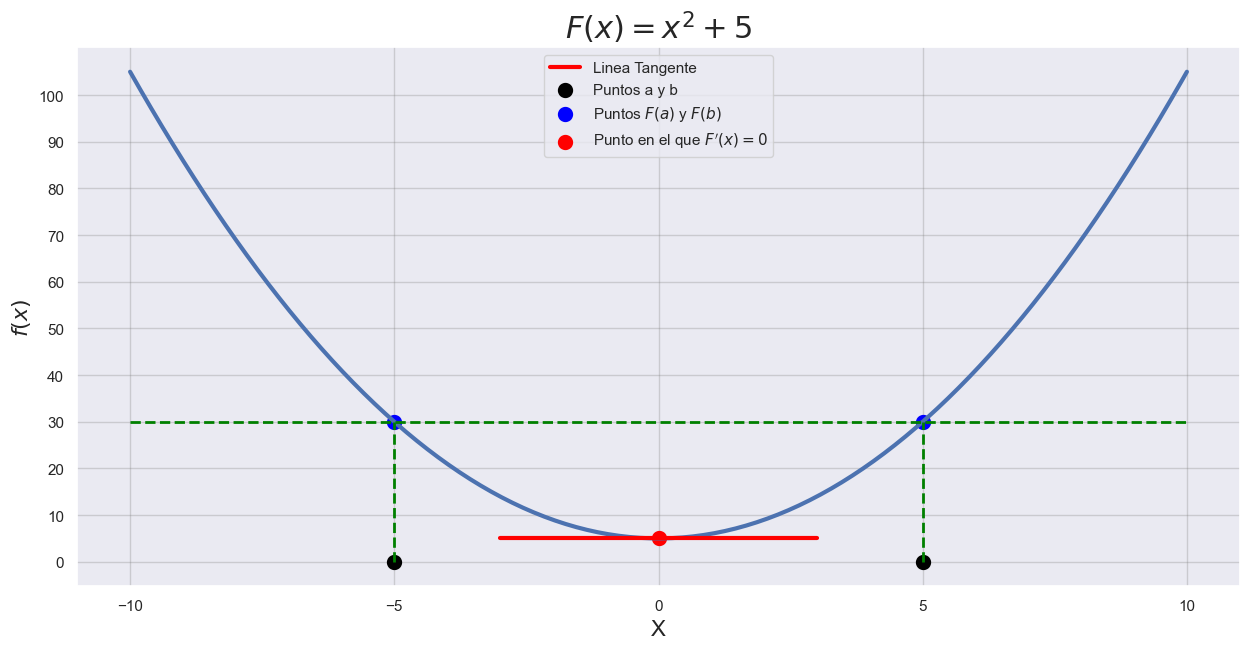

In [9]:
#Dominio e imagen de la grafica
x = np.linspace(-10,10,200)
f = lambda i: i**2 + 5 

#Configuracion de la grafica
plt.figure(figsize=(15,7))
plt.grid(alpha=0.3,c="grey")
plt.xticks(range(-10,11,5))
plt.yticks(range(-10,110,10))
plt.xlabel("X",size=16)
plt.ylabel("$f(x)$",size=16)
plt.title("$F(x)=x^{2}+5$",size=22)


#Funcion
plt.plot(x,f(x),lw=3)

#Algunas lineas utiles
plt.plot(np.linspace(-10,10,2),[f(5)]*2,ls="dashed",color="green",lw=2)
plt.plot((5,5),(0,f(5)),ls="dashed",color="green",lw=2)
plt.plot((-5,-5),(0,f(5)),ls="dashed",color="green",lw=2)
plt.plot((-3,3),(5,5),color="red",label="Linea Tangente",lw=3)

#Algunos puntos utiles
plt.scatter((-5,5),(0,0),lw=5,color="black",label="Puntos a y b")
plt.scatter((-5,5),(f(-5),f(5)),lw=5,color="blue",label="Puntos $F(a)$ y $F(b)$")
plt.scatter(0,f(0),lw=5,color="red",label="Punto en el que $F'(x)=0$")

plt.legend(loc="upper center")
plt.show()

<a name='5'></a>
## Derivadas de orden superior

Es posible obtener la derivada de la derivada, es decir, si tenemos una función $f(x)$ cuya derivada es $f^\prime(x)$, entonces podemos calcular la derivada a esta última función, para obtener $f^{\prime\prime}(x)$, a esta última función, si es que existe, se le conoce como la segunda derivada de $f(x)$. También se puede denotar a la segunda derivada com $f^{(2)}(x)$.

En general, si $f(x)$ es derivable $k$ veces, entonces es posible obtener la $k$-ésima derivada de dicha función, que se escribe como:
$$ 
\frac{d^kf(x)}{dx^k} = f^{(k)}(x)
$$

<a name='5-1'></a>
### Ejemplo 4

Calcular la cuarta derivada de $f(x)= 3x^4 + 2x^2 - 20$.
  
Para calcular la derivada solicitada de $f(x)$ se deben realizar los cálculos recursivos desde la primera derivada de la función:

$$
\begin{eqnarray}
f^\prime(x) & = & 12x^3 + 4x \\
f^{(2)}(x) & = & 36x^2 + 4 \\
f^{(3)}(x) & = & 72x  \\
f^{(4)}(x) & = & 72 \\
\end{eqnarray}  
$$ 

Observe las gráficas de cada función y explique el comportamiento de cada una de ellas.

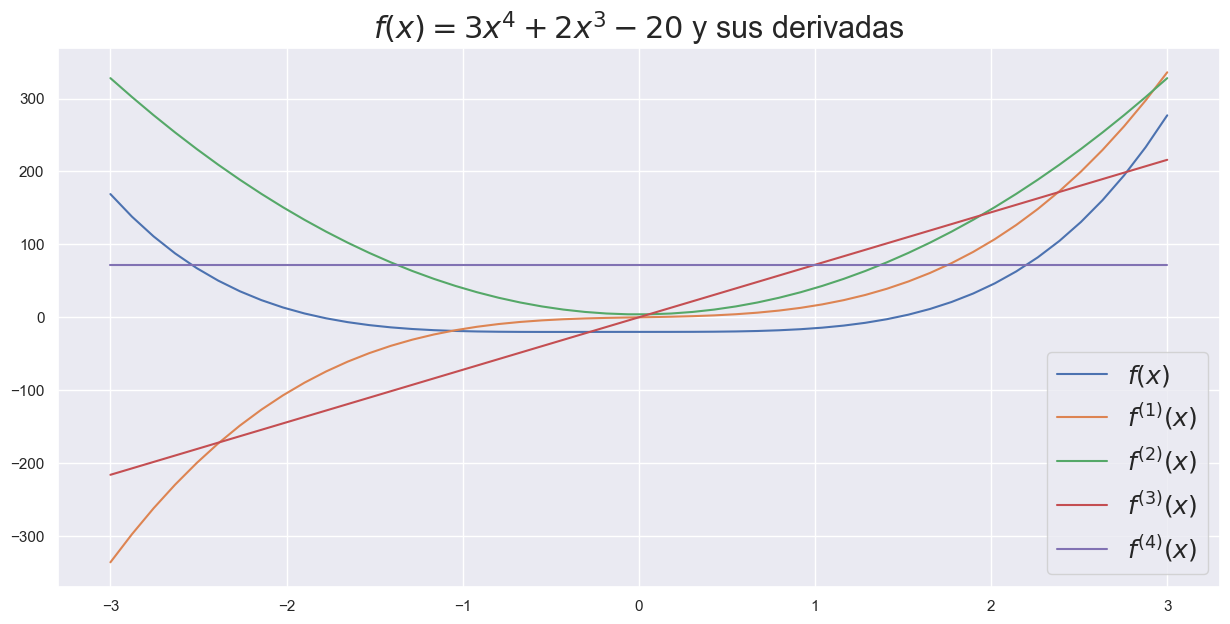

In [10]:
# Definimos la función y sus cuatro derivadas
f = lambda x: 3*x**4 + 2*x**3 -20
f1 = lambda x: 12*x**3 + 4*x
f2 = lambda x: 36*x**2 + 4
f3 = lambda x: 72*x
f4 = lambda x: 72*np.ones(len(x))

x = np.linspace(-3, 3, 50) # Codominio de la función


# Graficamos la función y su derivada
plt.figure(figsize=(15,7))
plt.title('$f(x)=3x^4 + 2x^3 -20$ y sus derivadas',fontsize=22)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, f1(x), label='$f^{(1)}(x)$')
plt.plot(x, f2(x), label='$f^{(2)}(x)$')
plt.plot(x, f3(x), label='$f^{(3)}(x)$')
plt.plot(x, f4(x), label='$f^{(4)}(x)$')
plt.legend(fontsize=18)
plt.show()

<a name='5-2'></a>
### Ejemplo 5

1. Utilizando la regla de L'Hopital encuentra el límite de $\displaystyle f(x)=\frac{\sin(x)}{x}$ cuando $x$ tiende a cero.
2. Encuentra la primera y segunda derivada de la siguientes funciones:
- a) $f(x)= x^5 - 2x^3 + x$ 
- b) $f(x)= 4 \cos x^2$

**Solución 1.**

1. Al cumplirse las condiciones de la regla podemos asegurar que:
 $$ \lim_{x \to 0} \frac{\sin (x)}{x} = \lim_{x \to 0} \frac{\sin^\prime(x)}{x^\prime} = \lim_{x \to 0} \frac{\cos(x)}{1}=1$$


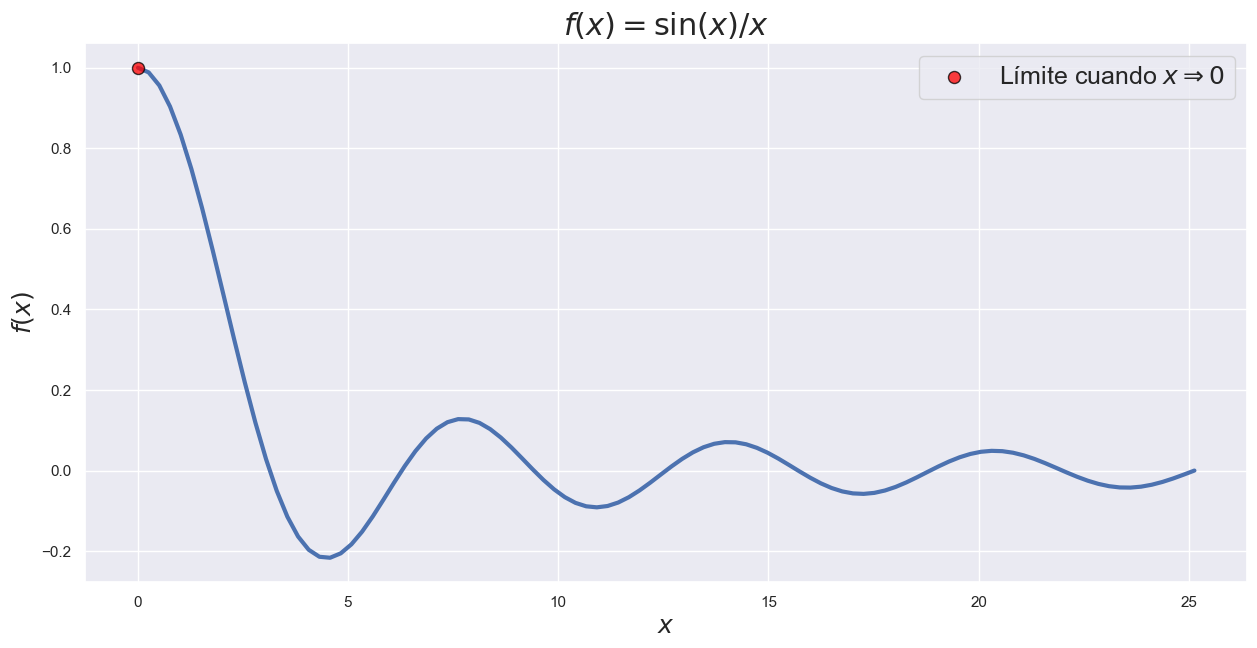

In [11]:
f = lambda x: np.sin(x) / x

x = np.linspace(0.01, 8*np.pi, num=100) # Codominio de la función


# Graficamos la función y el punto (0, f(0))
plt.figure(figsize=(15,7))
plt.title('$f(x)=\sin(x) / x$',fontsize=22)
plt.ylabel("$f(x)$",fontsize=18)
plt.xlabel("$x$",fontsize=18)
plt.plot(x, f(x),lw=3)
plt.scatter(0, 1, label='Límite cuando $x \Rightarrow 0$',
            fc='red', 
            ec='black',
            alpha=0.75,
            s=75, 
            zorder=10)

plt.legend(fontsize=18)
plt.show()

**Solución 2.**

2.a) Aplicando las reglas de derivación obtenemos:
  $$f^\prime(x)= 5x^4 - 6x^2 +1$$ 
  $$f^{\prime\prime}(x)= 20x^3 - 12 x $$ 

2.b) Aplicando las regla de la cadena obtenemos:
  $$f^\prime(x)= -4 \sin x^2(2x) = -8x \sin x^2$$ 
  $$f^{\prime\prime}(x)= -8 \sin x^2 -8x (\cos x^2(2x)) = -8 \sin x^2 -16x^2 (\cos x^2)$$ 

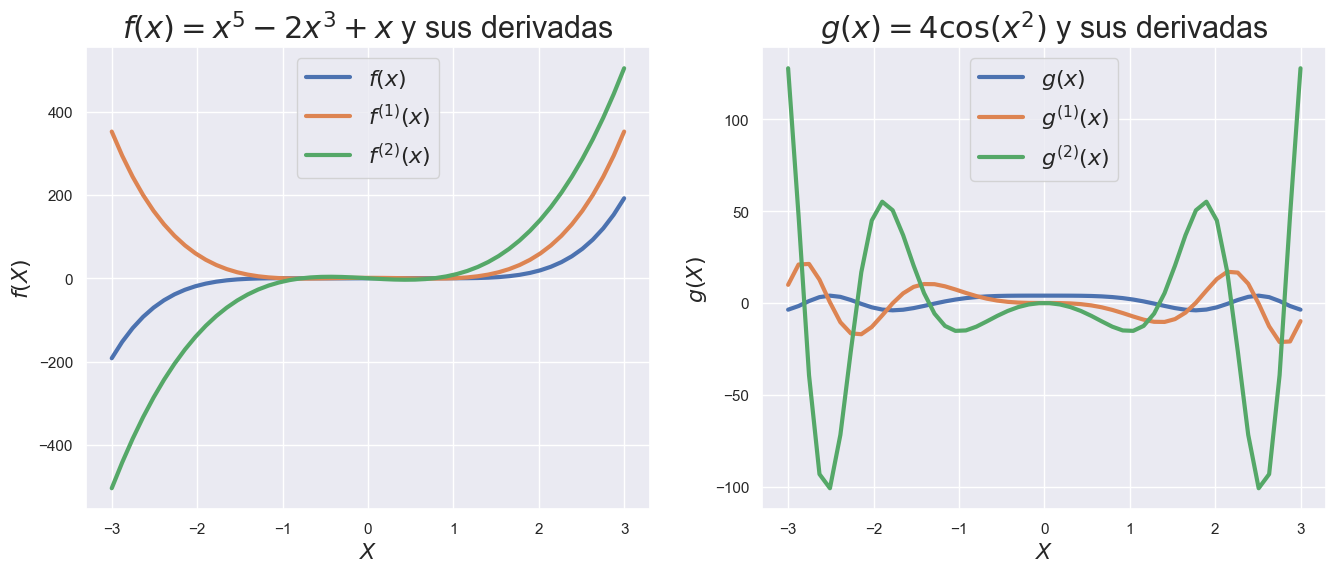

In [12]:
# Definimos la primera función y sus derivadas
f = lambda x: x**5 - 2*x**3 + x
f1 = lambda x: 5*x**4 -6*x**2 + 1
f2 = lambda x: 20*x**3 - 12*x

# Definimos la segunda función y sus derivadas
g = lambda x: 4*np.cos(x**2)
g1 = lambda x: -8*x*np.sin(x**2)
g2 = lambda x: -8*np.sin(x**2) - 16*x**2*np.cos(x**2)

x = np.linspace(-3, 3, 50) # Codominio de las funciones

# Graficamos las funciones y sus derivadas
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(x, f(x), label='$f(x)$',lw=3)
ax1.plot(x, f1(x), label='$f^{(1)}(x)$',lw=3)
ax1.plot(x, f2(x), label='$f^{(2)}(x)$',lw=3)
ax1.legend(loc='upper center',fontsize=16)
ax1.set_title('$f(x)=x^5 - 2x^3 + x$ y sus derivadas',fontsize=22)
ax1.set_xlabel

ax2.plot(x, g(x), label='$g(x)$',lw=3)
ax2.plot(x, g1(x), label='$g^{(1)}(x)$',lw=3)
ax2.plot(x, g2(x), label='$g^{(2)}(x)$',lw=3)
ax2.legend(loc='upper center',fontsize=16)
ax2.set_title('$g(x)=4\cos(x^2)$ y sus derivadas',fontsize=22)

ax1.set_xlabel("$X$",fontsize=16)
ax1.set_ylabel("$f(X)$",fontsize=16)
ax2.set_xlabel("$X$",fontsize=16)
ax2.set_ylabel("$g(X)$",fontsize=16)

plt.show()


# Ejercicios

Derive las siguientes funciones siguiendo las reglas del apartado [Reglas de derivación](#3):

__Notas__: 
 - _Para responder ejecuta la celda correspondiente (en Windows presiona Shift + Enter) y coloca tu respuesta_
 - _Recuerda para representar potencias ocupa el acento circunflejo (^), por ejemplo, para representar x al cuadrado escribimos x^2_
 - _En el caso de que las potencias tengas mas de un elemento recuerda ocupar parentesis, por ejemplo, x elevado a n+1 queda como x^(n+1)_

## 1. Potencias:

a) $F(x) = x^{5}$

In [14]:
Ejercicio_1a()

<IPython.core.display.Latex object>

= 3x


----------------------------------------------------------------------------------------------------
Tu respuesta es incorrecta, verifica las reglas de la derivacion y vuelve a intentar


In [ ]:
Ejercicio_1a()

b) $G(x) = x^{m}$

In [ ]:
Ejercicio_1b()

In [ ]:
Ejercicio_1b()

## 2. Constantes

a) $F(x)=\pi^{435}$

In [ ]:
Ejercicio_2a()

In [ ]:
Ejercicio_2a()

b) $G(x)=e^{\pi}$

In [ ]:
Ejercicio_2b()

In [ ]:
Ejercicio_2b()

## 3.- Regla de multiplicaion por constante

a) $F(x)= 10x^{4}$

In [ ]:
Ejercicio_3a()

In [ ]:
Ejercicio_3a()

b) $G(x)= Ax^{n}$

In [ ]:
Ejercicio_3b()

## 4.- Regla de Suma y Diferencia

a) $ F(x)= x^2 + x + 1 $

In [ ]:
Ejercicio_4a()

In [ ]:
Ejercicio_4a()

b) $ G(x)= \sin(x) - \cos(x)$

In [ ]:
Ejercicio_4b()

In [ ]:
Ejercicio_4b()

c) $ H(x)= Ax^m - Bx^n + C $

In [ ]:
Ejercicio_4c()

In [ ]:
Ejercicio_4c()

## 5.- Regla de Producto

a) $ F(x)= \left( x^4 \right) \left( x^{-2} \right) $     
__NOTA__:Reduce la solucion a su minima expresion

b) $ G(x) = \sin(x)\cos(x)$

In [ ]:
Ejercicio_5a()

In [ ]:
Ejercicio_5a()

In [ ]:
Ejercicio_5b()

In [ ]:
Ejercicio_5b()

## 6.- Regla de Cociente

a) $ F(x)=  \frac{sin(x)}{x} $

__Nota:__ Reduce la expresion del numerador

__Formato__: ( f(x) )/( g(x) )

In [ ]:
Ejercicio_6a()

In [ ]:
Ejercicio_6a()

b) $ G(x)=  \frac{1}{x^2+x+1} $

In [ ]:
Ejercicio_6b()

In [ ]:
Ejercicio_6b()

## 7.- Regla de la Cadena

a) $ F(x)= \left( 5x^2 + 2x \right)^{2} $

In [ ]:
Ejercicio_7a()

In [ ]:
Ejercicio_7a()

b) $ G(x)= \cos(x^2 +3)$

In [ ]:
Ejercicio_7b()

In [ ]:
Ejercicio_7b()